In [1]:
# IMPORTING THE LIBRARIES

import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
import pandas as pd

# Read the CSV file with the appropriate encoding
#Select the necessary columns to use
train = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\AI\datasets\Project-3-Sentiment analysis-train.csv', encoding='latin1', usecols=['text','sentiment'])
test = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\AI\datasets\Project-3-Sentiment analysis-test.csv', encoding='latin1', usecols=['text','sentiment'])


In [3]:
# TRAIN.HEAD TO SEE COLUMN NAME AND INDEX
train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [4]:
test.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [5]:
# WE PRINT THE SHAPE OF BOTH TRAIN AND TEST DATA

print(train.shape)
print(test.shape)

(27481, 2)
(4815, 2)


In [6]:
# AS WE HAVE TRAINING DATA AND TESTING DATA IN DIFFERENT FILES SO WE CONCATENATE THEM BY USING PANDAS FUNCTION

data = pd.concat([train,test], axis=0)

In [7]:
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
#SHAPE OF DATA AFTER CINCATENATION

data.shape

(32296, 2)

In [9]:
#TO CHECK WHEATHER THERE ARE NULL VALUES OR NOT IN OUR DATASET AND WE FOUND THAT BOTH COLUMN HAVE SONE NULL VALUES

data.isnull().sum()

text         1282
sentiment    1281
dtype: int64

In [10]:
# BY USING DROPNA WE REMOVE THTA NULL VALUES PERMANENTLY

data = data.dropna()

In [11]:
#TO CHECK DATATYPES , INDEXING WE USE INFO AND WE OBSERVED THAT WE NEED TO RESET THE INDEXING

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31014 entries, 0 to 3533
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       31014 non-null  object
 1   sentiment  31014 non-null  object
dtypes: object(2)
memory usage: 726.9+ KB


In [12]:
#RESET THE INDEXING

data.reset_index(drop=True, inplace=True)

In [13]:
#TO CHECK WHEATHER THERE ARE DUPLICATE ROWS OR NOT IN OUR COLUMN

data[data.duplicated()]

,text,sentiment


In [14]:
# TO CHECH VALUE COUNTS OF OUR OUTPUT COLUMNS
# THERE ARE THREE CLASSES IN OUR OUTPUT COLUMN 

data['sentiment'].value_counts()

sentiment
neutral     12547
positive     9685
negative     8782
Name: count, dtype: int64

In [15]:
data['text'][66]

'  He`s awesome... Have you worked with him before? He`s a good friend.'

PRE PROCESSING

In [16]:
# IN THIS WHAT WE DID WE LOWER THE TEXT 

data['text'] = data['text'].str.lower()

In [17]:
data.head(2)

,text,sentiment
0,"i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,negative


In [18]:
#THERE ARE LOTS OF PUNCTUATIONS IN OUR TEXT WHICH ARE NOT USEFUL SO TO REMOVE IT WE IMPORT STRING.PUNCTUATION

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
exclude = string.punctuation

In [20]:
# CREATED A FUNCTION TO REMOVE PUNCTUATION MARKS
# In this function translate will remove all punctuations that are in exclude

def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))
        

In [21]:
#APPY THAT remove_punc FUNCTION ON TEXT COLUMN

data['text'] = data['text'].apply(remove_punc)

In [22]:
# IMPORTING WORD TOKENIZE FROM NLTK TO CONVERT TEXT INTO WORD TOKEN

from nltk.tokenize import word_tokenize
text_tokens = [word_tokenize(i) for i in data['text']]

In [23]:
text_tokens

[['id', 'have', 'responded', 'if', 'i', 'were', 'going'],
 ['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'],
 ['my', 'boss', 'is', 'bullying', 'me'],
 ['what', 'interview', 'leave', 'me', 'alone'],
 ['sons',
  'of',
  'why',
  'couldnt',
  'they',
  'put',
  'them',
  'on',
  'the',
  'releases',
  'we',
  'already',
  'bought'],
 ['httpwwwdothebouncycomsmf',
  'some',
  'shameless',
  'plugging',
  'for',
  'the',
  'best',
  'rangers',
  'forum',
  'on',
  'earth'],
 ['2am',
  'feedings',
  'for',
  'the',
  'baby',
  'are',
  'fun',
  'when',
  'he',
  'is',
  'all',
  'smiles',
  'and',
  'coos'],
 ['soooo', 'high'],
 ['both', 'of', 'you'],
 ['journey',
  'wow',
  'u',
  'just',
  'became',
  'cooler',
  'hehe',
  'is',
  'that',
  'possible'],
 ['as',
  'much',
  'as',
  'i',
  'love',
  'to',
  'be',
  'hopeful',
  'i',
  'reckon',
  'the',
  'chances',
  'are',
  'minimal',
  'p',
  'im',
  'never',
  'gon',
  'na',
  'get',
  'my',
  'cake',
  'and',
  

In [24]:
from nltk.tokenize import RegexpTokenizer

In [25]:
# THIS WILL REMOVE THE ALPHANUMERINC VALUES FROM THE WHOLE TEXT

removal = RegexpTokenizer(r'\w+')
removal

RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [26]:
# CREATED A TOKENS OF UPDATED TEXTS

new_text_tokens = [removal.tokenize(i) for i in data['text']]
new_text_tokens

[['id', 'have', 'responded', 'if', 'i', 'were', 'going'],
 ['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'],
 ['my', 'boss', 'is', 'bullying', 'me'],
 ['what', 'interview', 'leave', 'me', 'alone'],
 ['sons',
  'of',
  'why',
  'couldnt',
  'they',
  'put',
  'them',
  'on',
  'the',
  'releases',
  'we',
  'already',
  'bought'],
 ['httpwwwdothebouncycomsmf',
  'some',
  'shameless',
  'plugging',
  'for',
  'the',
  'best',
  'rangers',
  'forum',
  'on',
  'earth'],
 ['2am',
  'feedings',
  'for',
  'the',
  'baby',
  'are',
  'fun',
  'when',
  'he',
  'is',
  'all',
  'smiles',
  'and',
  'coos'],
 ['soooo', 'high'],
 ['both', 'of', 'you'],
 ['journey',
  'wow',
  'u',
  'just',
  'became',
  'cooler',
  'hehe',
  'is',
  'that',
  'possible'],
 ['as',
  'much',
  'as',
  'i',
  'love',
  'to',
  'be',
  'hopeful',
  'i',
  'reckon',
  'the',
  'chances',
  'are',
  'minimal',
  'p',
  'im',
  'never',
  'gonna',
  'get',
  'my',
  'cake',
  'and',
  'stuff

In [27]:
#TO REMOVE STOPWORDS FROM OUR TEXT
#WE FIRST OF ALL CREATED A SET OF ALL ENGLISH STOPWORDS

from nltk.corpus import stopwords
sw_removal = set(stopwords.words('english'))

In [28]:
sw_removal

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
# JOIN WORDS BY USING JOIN FUNCTION BY LIST COMPREHENSION

new_text = [' '.join(i) for i in new_text_tokens]

In [30]:
# AGAIN WE TOKENIZE THE UPDATED TEXTS FROM WHICH WE REMOVED STOPWORDS

new_text_tokens = [word_tokenize(i) for i in new_text]
new_text_tokens

[['id', 'have', 'responded', 'if', 'i', 'were', 'going'],
 ['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'],
 ['my', 'boss', 'is', 'bullying', 'me'],
 ['what', 'interview', 'leave', 'me', 'alone'],
 ['sons',
  'of',
  'why',
  'couldnt',
  'they',
  'put',
  'them',
  'on',
  'the',
  'releases',
  'we',
  'already',
  'bought'],
 ['httpwwwdothebouncycomsmf',
  'some',
  'shameless',
  'plugging',
  'for',
  'the',
  'best',
  'rangers',
  'forum',
  'on',
  'earth'],
 ['2am',
  'feedings',
  'for',
  'the',
  'baby',
  'are',
  'fun',
  'when',
  'he',
  'is',
  'all',
  'smiles',
  'and',
  'coos'],
 ['soooo', 'high'],
 ['both', 'of', 'you'],
 ['journey',
  'wow',
  'u',
  'just',
  'became',
  'cooler',
  'hehe',
  'is',
  'that',
  'possible'],
 ['as',
  'much',
  'as',
  'i',
  'love',
  'to',
  'be',
  'hopeful',
  'i',
  'reckon',
  'the',
  'chances',
  'are',
  'minimal',
  'p',
  'im',
  'never',
  'gon',
  'na',
  'get',
  'my',
  'cake',
  'and',
  

In [31]:
# HERE WE DO LIST CMPREHENSION TO CREATE A LIST OF BY REMOVING STOPWORDS
# IN THIS CODE ONE BY ONE LIST OF TEXT WILL GO FROM new_text_tokens AND THEN WE TAKE THOSE WORDS THAT ARE NOT IN sw_removal

without_sw= [[word for word in i if not word in sw_removal] for i in new_text_tokens]
without_sw

[['id', 'responded', 'going'],
 ['sooo', 'sad', 'miss', 'san', 'diego'],
 ['boss', 'bullying'],
 ['interview', 'leave', 'alone'],
 ['sons', 'couldnt', 'put', 'releases', 'already', 'bought'],
 ['httpwwwdothebouncycomsmf',
  'shameless',
  'plugging',
  'best',
  'rangers',
  'forum',
  'earth'],
 ['2am', 'feedings', 'baby', 'fun', 'smiles', 'coos'],
 ['soooo', 'high'],
 [],
 ['journey', 'wow', 'u', 'became', 'cooler', 'hehe', 'possible'],
 ['much',
  'love',
  'hopeful',
  'reckon',
  'chances',
  'minimal',
  'p',
  'im',
  'never',
  'gon',
  'na',
  'get',
  'cake',
  'stuff'],
 ['really', 'really', 'like', 'song', 'love', 'story', 'taylor', 'swift'],
 ['sharpie', 'running', 'dangerously', 'low', 'ink'],
 ['want', 'go', 'music', 'tonight', 'lost', 'voice'],
 ['test', 'test', 'lg', 'env2'],
 ['uh', 'oh', 'sunburned'],
 ['sok', 'trying', 'plot', 'alternatives', 'speak', 'sigh'],
 ['ive',
  'sick',
  'past',
  'days',
  'thus',
  'hair',
  'looks',
  'wierd',
  'didnt',
  'hat',
  'wou

In [32]:
# WE AGAIN JOIN THE THE WORDS BY USING JOIN FUNCTION

clean_text = [' '.join(i) for i in without_sw]
clean_text

['id responded going',
 'sooo sad miss san diego',
 'boss bullying',
 'interview leave alone',
 'sons couldnt put releases already bought',
 'httpwwwdothebouncycomsmf shameless plugging best rangers forum earth',
 '2am feedings baby fun smiles coos',
 'soooo high',
 '',
 'journey wow u became cooler hehe possible',
 'much love hopeful reckon chances minimal p im never gon na get cake stuff',
 'really really like song love story taylor swift',
 'sharpie running dangerously low ink',
 'want go music tonight lost voice',
 'test test lg env2',
 'uh oh sunburned',
 'sok trying plot alternatives speak sigh',
 'ive sick past days thus hair looks wierd didnt hat would look httptinyurlcommnf4kw',
 'back home gon na miss every one',
 'hes',
 'oh marly im sorry hope find soon 3 3',
 'playing ghost online really interesting new updates kirin pet metamorph third job cant wait dragon pet',
 'cleaning house family comming later today',
 'got ta restart computer thought win7 supposed put end constant 

In [33]:
# WE PUT THIS CLEAN TEXT AGAIN IN DATAFRAME

data['text'] = clean_text

In [34]:
# IN THIS WE USED REGULAR EXPRESSION TO REMOVE URLS. IF WE SEE ANYTHING STARTS WITH http we remove that line

import re
pattern = r'http\S+'

# REPLACE THAT TEXT WITH BLANK
data['text'] = data['text'].str.replace(pattern,'',regex=True)

In [35]:
# WE USE LEMMATIZER TO REMOVE PREFIX AND SUFIX FROM THE WORD SO THAT WE WILL GET SMALL LENGTH OF TEXT AND AS WELL TO CAPTURE  MEANING

from nltk.stem import WordNetLemmatizer

In [36]:
# CREATE A OBJECT OF THE CLASS
lemma= WordNetLemmatizer()

In [37]:
# CREATE A LIST BY LIST COMPREHENSION 

word_tokens = [word_tokenize(i) for i in data['text']]

In [38]:
word_tokens

[['id', 'responded', 'going'],
 ['sooo', 'sad', 'miss', 'san', 'diego'],
 ['boss', 'bullying'],
 ['interview', 'leave', 'alone'],
 ['sons', 'couldnt', 'put', 'releases', 'already', 'bought'],
 ['shameless', 'plugging', 'best', 'rangers', 'forum', 'earth'],
 ['2am', 'feedings', 'baby', 'fun', 'smiles', 'coos'],
 ['soooo', 'high'],
 [],
 ['journey', 'wow', 'u', 'became', 'cooler', 'hehe', 'possible'],
 ['much',
  'love',
  'hopeful',
  'reckon',
  'chances',
  'minimal',
  'p',
  'im',
  'never',
  'gon',
  'na',
  'get',
  'cake',
  'stuff'],
 ['really', 'really', 'like', 'song', 'love', 'story', 'taylor', 'swift'],
 ['sharpie', 'running', 'dangerously', 'low', 'ink'],
 ['want', 'go', 'music', 'tonight', 'lost', 'voice'],
 ['test', 'test', 'lg', 'env2'],
 ['uh', 'oh', 'sunburned'],
 ['sok', 'trying', 'plot', 'alternatives', 'speak', 'sigh'],
 ['ive',
  'sick',
  'past',
  'days',
  'thus',
  'hair',
  'looks',
  'wierd',
  'didnt',
  'hat',
  'would',
  'look'],
 ['back', 'home', 'gon',

In [39]:
# LEMMATIZE THE WORDS

lemm_words = [lemma.lemmatize(word) for word in word_tokens[3]]

In [40]:
lemm_words

['interview', 'leave', 'alone']

In [41]:
## WE USE LEMMATIZER TO REMOVE PREFIX AND SUFIX FROM THE WORD SO THAT WE WILL GET SMALL LENGTH OF TEXT AND AS WELL TO CAPTURE  MEANING

from nltk.stem import PorterStemmer
stemer = PorterStemmer()

In [42]:
# CREATE A FUNCTION TO STEMED THE WORDS
# CREATE A LIST AND THEN JOIN THAT WORDS TO CREATE A TEXT 

def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# APPLY THAT FUNCTION ON TEXT COLUMN
data['text'] = data['text'].apply(stem_text)

In [43]:
data['text'][412]

'sure hope becom 420 afternoon'

In [44]:
data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [45]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [46]:
# encoded_sentiments = data['sentiment']

In [47]:
# data['sentiment'] = le.fit_transform(data['sentiment'])


# sentiment_mapping = dict(zip(data['sentiment'], encoded_sentiments))

# print(sentiment_mapping)

In [48]:
# CREATE A FUNCTION WHICH WILL GIVE FOLLOWING OUTPUT FOR A PARTICULAR SENTIMENT

def func(sentiment):
    if sentiment =='positive':
        return 0;
    elif sentiment =='negative':
        return 1;
    else:
        return 2;

# APPLY THE FUNCTION ON sentiment COLUMN
data['sentiment'] = data['sentiment'].apply(func)

In [49]:
# TO APPLY LSTM OF OUR DATASET
# IMPORT ALL THE NECESSARY LIBRARIES

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding,Dense, LSTM, BatchNormalization, Dropout, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
data.head()

,text,sentiment
0,id respond go,2
1,sooo sad miss san diego,1
2,boss bulli,1
3,interview leav alon,1
4,son couldnt put releas alreadi bought,1


In [51]:
# TOKENIZER IS USED TO MAKE TOKENS OF EVERY TEXT IN OUR COLUMN

tokens = Tokenizer()
tokens.fit_on_texts(data['text'])

In [52]:
# UNIQUE WORDS IN OUR TEXT AND THE SIZE OF OUR VOCABULARY OS 24628

vocab_size = len(tokens.word_index)+1
vocab_size

24628

In [53]:
# IN THIS CODE WE MAKE THE TOKENS FOR WVERY SINGLE WORD
# WE CAN SEE HOW TOKENS ARE ALLOTED TO EVERY WORD
seq= tokens.texts_to_sequences(data['text'])
seq

[[214, 1268, 2],
 [336, 55, 18, 1171, 1920],
 [1142, 4122],
 [864, 155, 408],
 [647, 300, 198, 913, 132, 452],
 [8987, 1921, 94, 3603, 1642, 1172],
 [3217, 1173, 184, 51, 523, 6230],
 [463, 446],
 [],
 [1922, 182, 21, 2298, 3218, 427, 740],
 [38, 7, 29, 2905, 545, 4888, 504, 1, 96, 68, 35, 4, 524, 227],
 [22, 22, 8, 143, 7, 576, 958, 2031],
 [6231, 208, 2452, 839, 4889],
 [17, 2, 234, 61, 224, 914],
 [391, 391, 4123, 8988],
 [1508, 39, 1025],
 [8989, 56, 2906, 2652, 915, 482],
 [75, 118, 525, 3, 2907, 233, 34, 4890, 66, 1411, 53, 34],
 [23, 33, 68, 35, 18, 320, 13],
 [207],
 [39, 8990, 1, 63, 29, 125, 108, 72, 72],
 [91,
  1643,
  370,
  22,
  421,
  32,
  303,
  8991,
  1412,
  8992,
  1269,
  181,
  14,
  59,
  3219,
  1412],
 [282, 142, 242, 2453, 199, 11],
 [9, 221, 4891, 376, 146, 3220, 383, 198, 202, 2299, 8993],
 [24, 799, 165, 483, 8994, 8995, 98, 635, 8996, 147, 1358],
 [317, 8997, 581, 526, 51, 1, 916],
 [1, 63],
 [76, 8998, 360, 959, 881],
 [2653, 351, 6232, 8999, 183, 4892,

In [54]:
# THIS CODE WILL GIVES US THE MAXIMUM LENGTH OF TEXT IN OUT DATASET
# THE MAX LENGTH IS 39 IN OUR DATASET

max_len = max([len(i) for i in seq])
max_len

39

In [55]:
# NOW WE NEED TO MAKE EVERY TEXT OF SAME SIZE SO THAT WE CAN CREATE A PROPER NEURAL NETWORK FOR MODEL
# FOR THAT WE WILL DO ZERO PADDING

pad_seq = sequence.pad_sequences(seq, maxlen=max_len, padding='post')

pad_seq

array([[  214,  1268,     2, ...,     0,     0,     0],
       [  336,    55,    18, ...,     0,     0,     0],
       [ 1142,  4122,     0, ...,     0,     0,     0],
       ...,
       [   16,   165,   100, ...,     0,     0,     0],
       [24626,    86,   468, ...,     0,     0,     0],
       [24627,  1765,   284, ...,     0,     0,     0]])

In [56]:
pad_seq.shape

(31014, 39)

In [57]:
np.array(data['sentiment'])

array([2, 1, 1, ..., 1, 0, 0], dtype=int64)

APPLY THE MODEL

In [101]:
# WE FINALLY APPLY LSTM MODEL ON DATASET
# WE ALSO ADD EMBEDDING LAYER SO THAT TO CREATE A DENSE VECTOR 
# AAPLIED LSTM LAYER WITH 128 NEURON AND WITH RELU AS A ACTIVATION FUNCTION
# AT THE END AAPLIED A DENSE LAYER WITH 3 NEURONS AS IN OUTPUT WE HAVE 3 CLASSES AND THATS WHY WE USED SOFTMAX AS A ACTIVATION FUNCTION

model = Sequential()
model.add(Embedding(vocab_size,80, input_length=max_len))
model.add(LSTM(128, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [102]:
# SUMMARY OF THE MODEL

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 39, 80)            1970240   
                                                                 
 lstm_8 (LSTM)               (None, 128)               107008    
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2077635 (7.93 MB)
Trainable params: 2077635 (7.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# IN THIS WE SELECTED ADAM AS AOPTIMIZER LOSS IS sparse_categorical_crossentropy AND METRIC IS ACCURACY

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
# FIT THE MODEL WITH EPOCHS EQUALS TO 10 AND VALIDATION SPLIT AS 0.2
# IF WE  USE RNN THEN ACCURACCY IS NOT MEETING TO SATISFACTORY RESULTS
# IF WE USE TANH AS AN ACTIVATION FUNCTION THEN IT IS NOT GIVING PROPER RESULT

history = model.fit(pad_seq, data['sentiment'], epochs=20, batch_size=32, validation_split=0.3)

Epoch 1/20
679/679 [==============================] - 48s 66ms/step - loss: 1.0897 - accuracy: 0.4027 - val_loss: 1.0862 - val_accuracy: 0.4088
Epoch 2/20
679/679 [==============================] - 44s 65ms/step - loss: 1.1280 - accuracy: 0.4028 - val_loss: 1.0869 - val_accuracy: 0.4088
Epoch 3/20
679/679 [==============================] - 44s 65ms/step - loss: 1.0875 - accuracy: 0.4027 - val_loss: 1.0870 - val_accuracy: 0.4088
Epoch 4/20
679/679 [==============================] - 44s 65ms/step - loss: 1.0878 - accuracy: 0.4036 - val_loss: 1.0866 - val_accuracy: 0.4088
Epoch 5/20
679/679 [==============================] - 44s 65ms/step - loss: 1.0875 - accuracy: 0.4027 - val_loss: 1.0866 - val_accuracy: 0.4088
Epoch 6/20
679/679 [==============================] - 44s 65ms/step - loss: 1.0871 - accuracy: 0.4027 - val_loss: 1.0861 - val_accuracy: 0.4088
Epoch 7/20
679/679 [==============================] - 44s 65ms/step - loss: 1.0876 - accuracy: 0.4028 - val_loss: 1.0859 - val_accuracy:

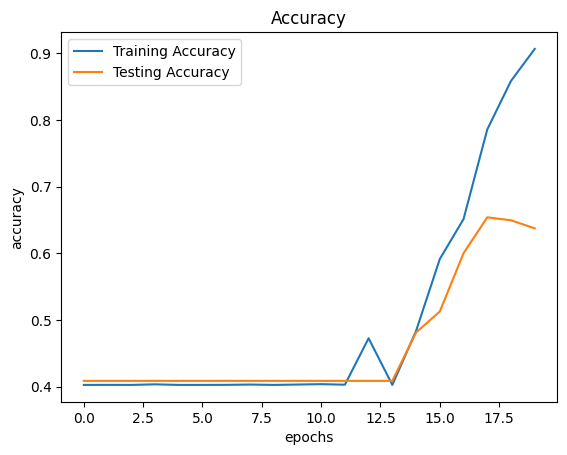

In [105]:
# PLOT ACCURACY VS EPOCHS GRAPH

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

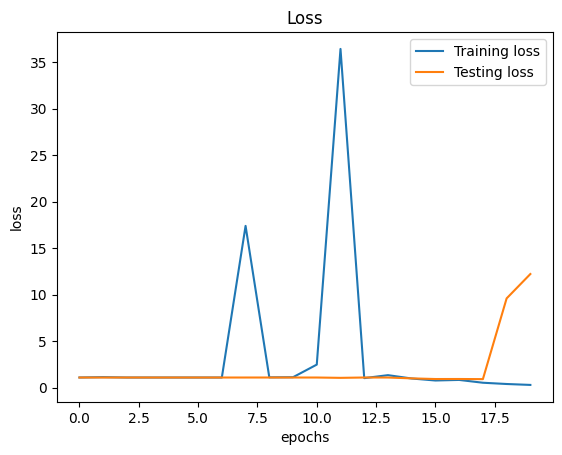

In [106]:
# PLOT LOSS VS EPOCHS GRAPH

plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

DEALING WITH OVERFITTING

In [64]:
# OVERFITTING IS OCCURING AND HENCE WE WILL USE BATCH NORMALIZATION AND DROPOUT LAYER
# IN EVERY LAYER WE DROP 60 PERCENT OF NEURONS

# model2 = Sequential()
# model2.add(Embedding(vocab_size, 80, input_length=max_len))
# model2.add(LSTM(128, activation='relu'))
# model2.add(BatchNormalization())  # Add batch normalization layer
# model2.add(Dropout(0.6))  # Add dropout layer with dropout rate
# model2.add(Dense(3, activation='softmax'))

from keras.layers import Embedding, LSTM, Dense, LeakyReLU

# Define the leaky ReLU slope parameter
alpha = 0.01  # You can adjust this value as needed

# Define your model
model2 = Sequential()
model2.add(Embedding(vocab_size, 80, input_length=max_len))
model2.add(LSTM(412))
# Use LeakyReLU instead of 'relu'
model2.add(LeakyReLU(alpha=alpha))
model2.add(Dense(3, activation='softmax'))

In [ ]:
# COMPILE THE MODEL WITH RMSPROP

model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
# WE WILL ALSO USE EARLY STOPING IN OUR MODEL SO THAT IF ACCURACY IS NOT INCREASING FOR MORE THAN 3 EPOCHS THEN WE WILL STOP OUR MODEL

from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)  # Stop training if validation loss doesn't improve for 3 epochs

# history2 = model2.fit(pad_seq, data['sentiment'], epochs=40, batch_size=32,validation_split=0.22, callbacks=[early_stopping])
history2 = model2.fit(pad_seq, data['sentiment'], epochs=20, batch_size=32,validation_split=0.23)

Epoch 1/20
747/747 [==============================] - 108s 138ms/step - loss: 1.0894 - accuracy: 0.4006 - val_loss: 1.0880 - val_accuracy: 0.4117
Epoch 2/20
747/747 [==============================] - 82s 110ms/step - loss: 1.0887 - accuracy: 0.4024 - val_loss: 1.0859 - val_accuracy: 0.4117
Epoch 3/20
747/747 [==============================] - 78s 104ms/step - loss: 1.0877 - accuracy: 0.4024 - val_loss: 1.0857 - val_accuracy: 0.4117
Epoch 4/20
747/747 [==============================] - 85s 114ms/step - loss: 1.0582 - accuracy: 0.4406 - val_loss: 0.9950 - val_accuracy: 0.5017
Epoch 5/20
747/747 [==============================] - 97s 129ms/step - loss: 0.8867 - accuracy: 0.5864 - val_loss: 0.7848 - val_accuracy: 0.6672
Epoch 6/20
747/747 [==============================] - 98s 131ms/step - loss: 0.6507 - accuracy: 0.7355 - val_loss: 0.7939 - val_accuracy: 0.6703
Epoch 7/20
747/747 [==============================] - 96s 128ms/step - loss: 0.4751 - accuracy: 0.8252 - val_loss: 0.8304 - val_a

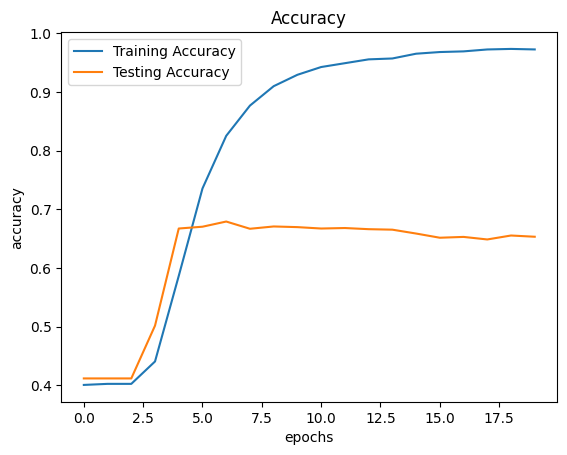

In [67]:
# PLOT ACCURACY VS EPOCHS GRAPH

plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

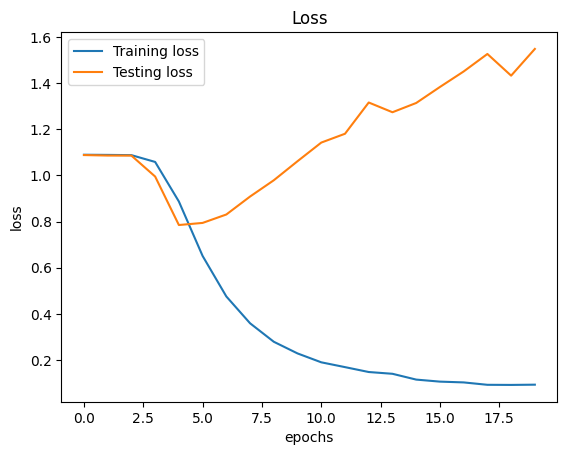

In [89]:
# PLOT LOSS VS EPOCHS GRAPH

plt.plot(history2.history['loss'], label = 'Training loss')
plt.plot(history2.history['val_loss'], label = 'Testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

In [83]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 80, input_length=max_len))
model3.add(LSTM(256, activation='relu'))
model3.add(BatchNormalization())  # Add batch normalization layer
model3.add(Dropout(0.4))  # Add dropout layer with dropout rate OF 0.4
model3.add(Dense(3, activation='softmax'))

In [84]:
model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
history3= model3.fit(pad_seq, data['sentiment'], epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
727/727 [==============================] - 74s 99ms/step - loss: 0.9410 - accuracy: 0.5403 - val_loss: 0.7667 - val_accuracy: 0.6895
Epoch 2/20
727/727 [==============================] - 73s 100ms/step - loss: 0.7431 - accuracy: 0.6949 - val_loss: 1.0531 - val_accuracy: 0.5173
Epoch 3/20
727/727 [==============================] - 73s 101ms/step - loss: 0.6551 - accuracy: 0.7376 - val_loss: 0.7566 - val_accuracy: 0.7011
Epoch 4/20
727/727 [==============================] - 66s 91ms/step - loss: 0.5720 - accuracy: 0.7825 - val_loss: 0.9340 - val_accuracy: 0.6884
Epoch 5/20
727/727 [==============================] - 73s 101ms/step - loss: 0.5003 - accuracy: 0.8176 - val_loss: 0.7605 - val_accuracy: 0.6951
Epoch 6/20
727/727 [==============================] - 71s 98ms/step - loss: 0.4428 - accuracy: 0.8454 - val_loss: 1.1337 - val_accuracy: 0.6678
Epoch 7/20
727/727 [==============================] - 71s 98ms/step - loss: 0.4011 - accuracy: 0.8629 - val_loss: 0.9296 - val_accura

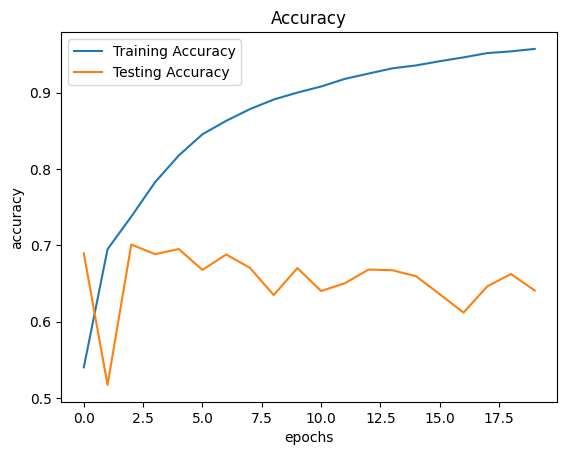

In [86]:
plt.plot(history3.history['accuracy'], label = 'Training Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

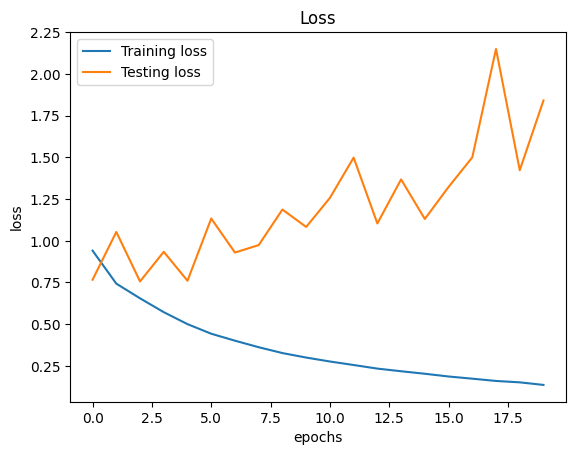

In [87]:
plt.plot(history3.history['loss'], label = 'Training loss')
plt.plot(history3.history['val_loss'], label = 'Testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

In [78]:
# HERE WE WILL USE L2 REGULARIZATION AND THE VALUE OF LAMBDA IS TAKEN TO BE 0.01

from keras.regularizers import l2

model4 = Sequential()
model4.add(Embedding(vocab_size,80, input_length=max_len))
model4.add(LSTM(256, kernel_regularizer=l2(0.1)))

model4.add(BatchNormalization())
model4.add(Dense(3,activation='softmax'))

In [79]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [80]:
history4 = model4.fit(pad_seq,data['sentiment'], epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
679/679 [==============================] - 76s 108ms/step - loss: 1.3306 - accuracy: 0.6039 - val_loss: 13.5753 - val_accuracy: 0.3046
Epoch 2/10
679/679 [==============================] - 73s 108ms/step - loss: 0.7061 - accuracy: 0.7121 - val_loss: 1.0118 - val_accuracy: 0.5723
Epoch 3/10
679/679 [==============================] - 73s 108ms/step - loss: 0.6136 - accuracy: 0.7598 - val_loss: 0.9478 - val_accuracy: 0.5308
Epoch 4/10
679/679 [==============================] - 73s 108ms/step - loss: 0.5561 - accuracy: 0.7916 - val_loss: 1.6166 - val_accuracy: 0.5352
Epoch 5/10
679/679 [==============================] - 72s 106ms/step - loss: 0.5108 - accuracy: 0.8103 - val_loss: 3.0209 - val_accuracy: 0.3171
Epoch 6/10
679/679 [==============================] - 70s 103ms/step - loss: 0.4762 - accuracy: 0.8278 - val_loss: 1.0206 - val_accuracy: 0.6029
Epoch 7/10
679/679 [==============================] - 73s 107ms/step - loss: 0.4451 - accuracy: 0.8442 - val_loss: 0.9568 - val_a

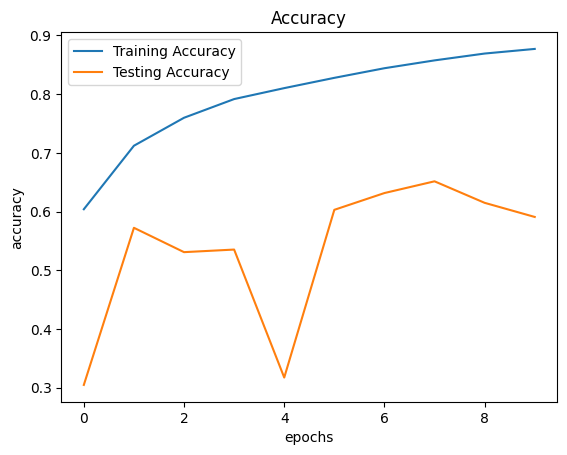

In [81]:
plt.plot(history4.history['accuracy'], label = 'Training Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

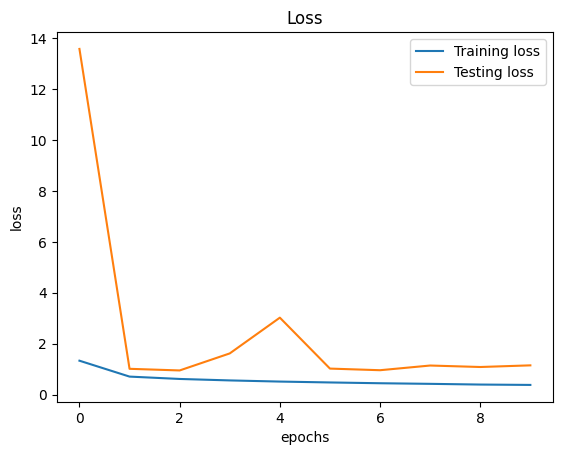

In [82]:
plt.plot(history4.history['loss'], label = 'Training loss')
plt.plot(history4.history['val_loss'], label = 'Testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

AS WE OBSERVED FROM ABOVE GRAPHS AND RESULTS THE MAXIMUM TRAINING ACCURACY IS 95% AND MAXIMUM VALIDATION ACCURACY IS 70%